In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
#load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
print("x_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("x_test.shape",x_test.shape)
print("y_test.shape",y_test.shape)

x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)
y_test.shape (10000,)


In [3]:
#Normalized data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
init1 = keras.initializers.VarianceScaling(scale=2., mode='fan_avg')

In [14]:
#define model
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer = init1,  use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dense(10, activation = "softmax"),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          78,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 75)                  │           7,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 75)                  │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,496 (353.50 KB)

 Trainable params: 88,578 (346.01 KB)

 Non-trainable params: 1,918 (7.49 KB)

# Learning rate (Power lr)


In [16]:
sgd = keras.optimizers.SGD(decay = 1e-3)
model1.compile(loss = "sparse_categorical_crossentropy",
              optimizer = sgd,
              metrics = ["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [17]:
run_model1 = model1.fit(x_train, y_train, epochs = 40, validation_split = 0.15)

Epoch 1/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7017 - loss: 0.9081 - val_accuracy: 0.8267 - val_loss: 0.4879
Epoch 2/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8246 - loss: 0.5097 - val_accuracy: 0.8408 - val_loss: 0.4390
Epoch 3/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8423 - loss: 0.4507 - val_accuracy: 0.8519 - val_loss: 0.4134
Epoch 4/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8497 - loss: 0.4229 - val_accuracy: 0.8559 - val_loss: 0.4028
Epoch 5/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8562 - loss: 0.4062 - val_accuracy: 0.8594 - val_loss: 0.3884
Epoch 6/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8628 - loss: 0.3860 - val_accuracy: 0.8632 - val_loss: 0.3797
Epoch 7/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8677 - loss: 0.3712 - val_accuracy: 0.8607 - val_loss: 0.3780
Epoch 8/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8698 - loss: 0.3660

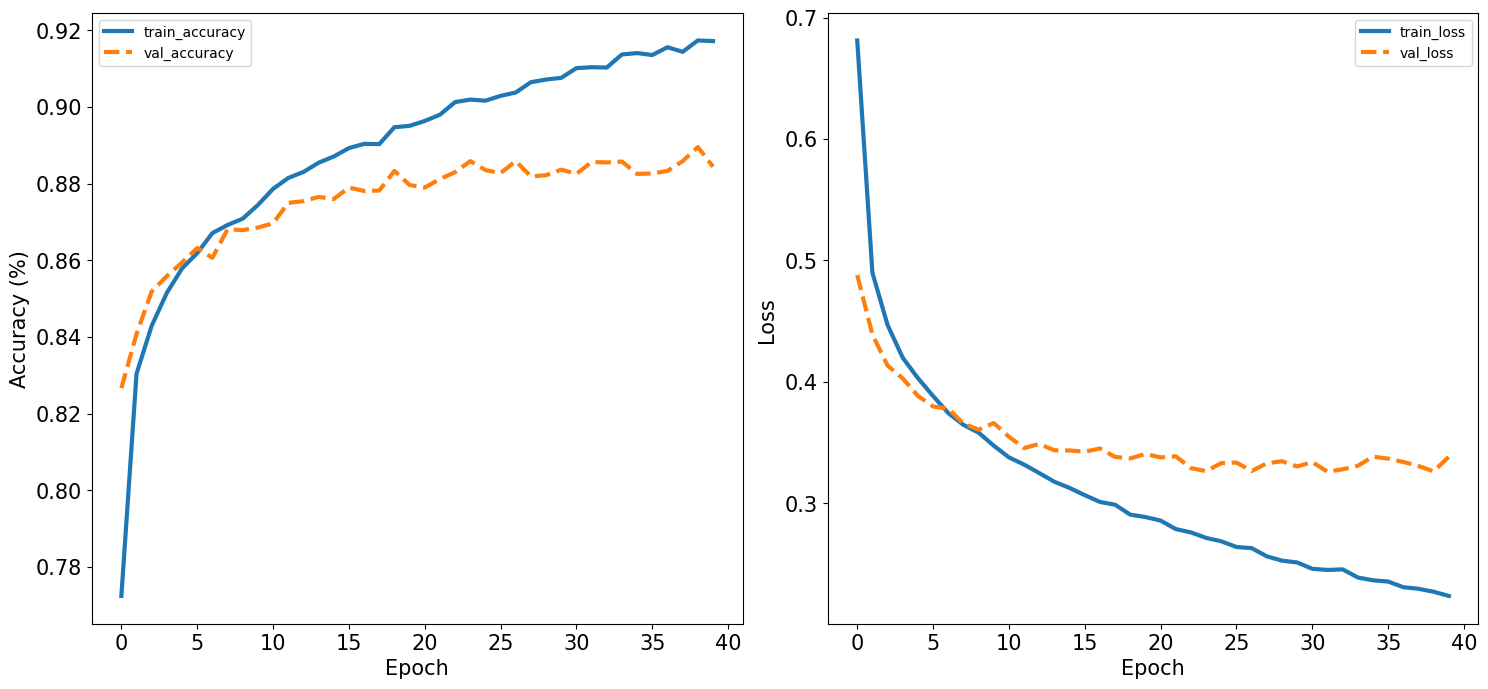

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed
ax1.plot(run_model1.history["accuracy"], label="train_accuracy", lw = 3, linestyle ='-')
ax1.plot(run_model1.history["val_accuracy"], label="val_accuracy", lw = 3, linestyle ='--')
ax1.set_ylabel('Accuracy (%)', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(run_model1.history["loss"], label="train_loss", lw = 3, linestyle ='-')
ax2.plot(run_model1.history["val_loss"], label="val_loss", lw = 3, linestyle ='--')
ax2.set_ylabel('Loss ', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


In [20]:
model1.evaluate(x_test, y_test, verbose = 0)

[0.35158348083496094, 0.876800000667572]

# Learning rate (Exp lr)


In [21]:
def exp_lr_func(eta0, s):
  def exp_lr(epoch):
    return eta0 * 0.1 ** (epoch / s)
  return exp_lr

In [22]:
exp_lr_1 = exp_lr_func(0.01, 5)
exp_lr_2 = keras.callbacks.LearningRateScheduler(exp_lr_1)

In [23]:
#define model
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer = init1,  use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dense(10, activation = "softmax"),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [24]:
model2.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [25]:
run_model2 = model2.fit(x_train, y_train, epochs = 40, validation_split = 0.15, callbacks = [exp_lr_2])

Epoch 1/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7041 - loss: 0.8964 - val_accuracy: 0.8312 - val_loss: 0.4849 - learning_rate: 0.0100
Epoch 2/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8252 - loss: 0.4999 - val_accuracy: 0.8469 - val_loss: 0.4408 - learning_rate: 0.0063
Epoch 3/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8367 - loss: 0.4707 - val_accuracy: 0.8498 - val_loss: 0.4248 - learning_rate: 0.0040
Epoch 4/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8427 - loss: 0.4538 - val_accuracy: 0.8523 - val_loss: 0.4182 - learning_rate: 0.0025
Epoch 5/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8460 - loss: 0.4370 - val_accuracy: 0.8520 - val_loss: 0.4140 - learning_rate: 0.0016
Epoch 6/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8507 - loss: 0.4270 - val_accuracy: 0.8534 - val_loss: 0.4103 - learning_rate: 0.0010
Epoch 7/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8458 

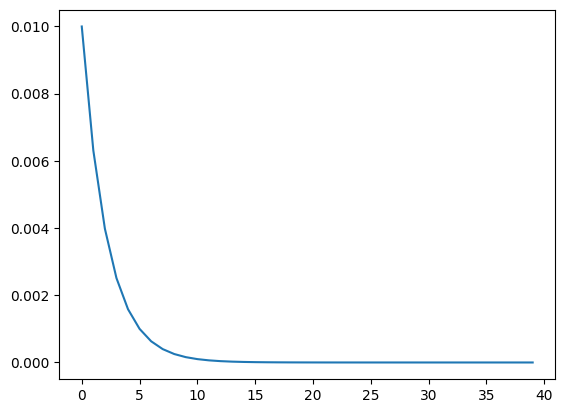

In [26]:
plt.plot(run_model2.epoch, run_model2.history["learning_rate"])

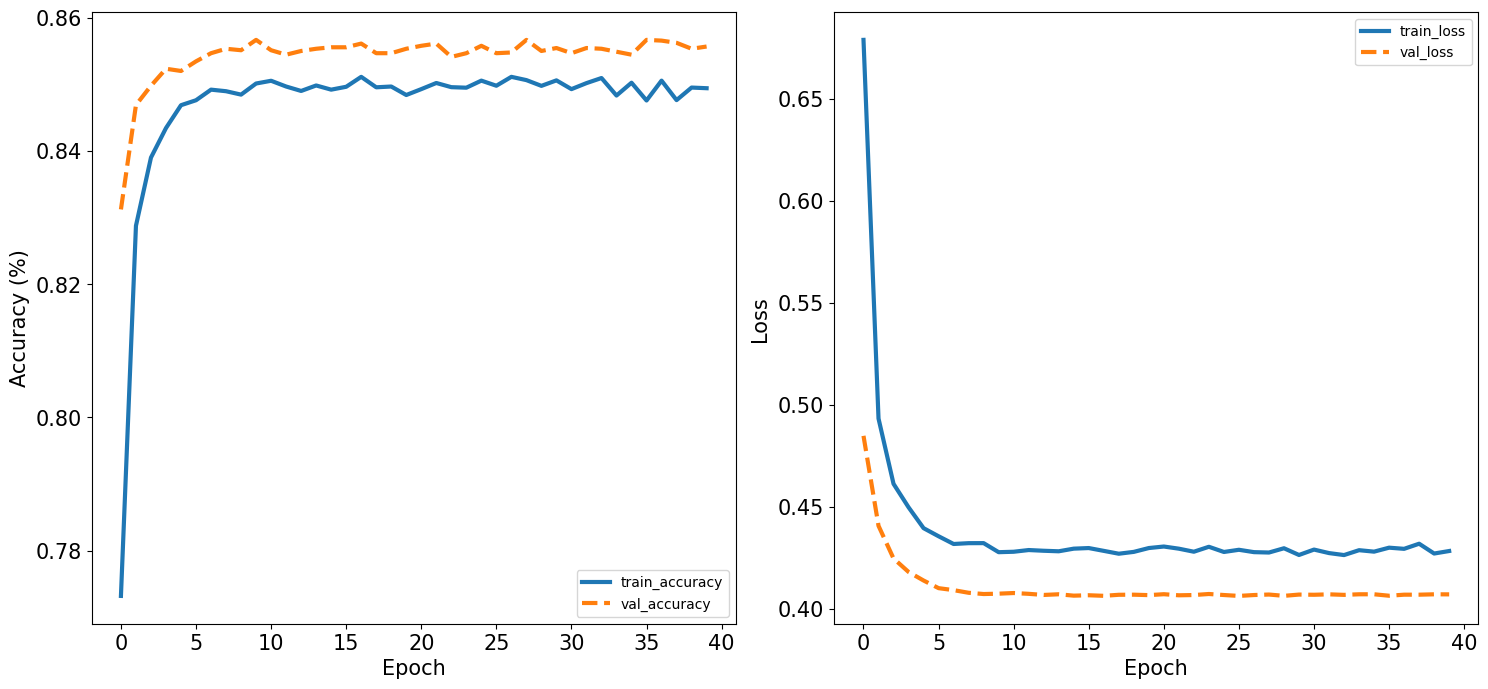

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed
ax1.plot(run_model2.history["accuracy"], label="train_accuracy", lw = 3, linestyle ='-')
ax1.plot(run_model2.history["val_accuracy"], label="val_accuracy", lw = 3, linestyle ='--')
ax1.set_ylabel('Accuracy (%)', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(run_model2.history["loss"], label="train_loss", lw = 3, linestyle ='-')
ax2.plot(run_model2.history["val_loss"], label="val_loss", lw = 3, linestyle ='--')
ax2.set_ylabel('Loss ', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


In [28]:
model2.evaluate(x_test, y_test, verbose = 0)

[0.4360888600349426, 0.8461999893188477]

## Piecewise lr

In [29]:
def piecewise_lr(epoch):
  if epoch < 5:
    return 0.01
  elif epoch < 15:
    return 0.005
  else:
    return 0.001

In [30]:
piecewise_lr = keras.callbacks.LearningRateScheduler(piecewise_lr)

In [31]:
#define model
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer = init1,  use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dense(10, activation = "softmax"),
])

In [32]:
model3.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [33]:
run_model3 = model3.fit(x_train, y_train, epochs = 40, validation_split = 0.15, callbacks = [piecewise_lr])

Epoch 1/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7053 - loss: 0.8900 - val_accuracy: 0.8352 - val_loss: 0.4765 - learning_rate: 0.0100
Epoch 2/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8314 - loss: 0.4930 - val_accuracy: 0.8492 - val_loss: 0.4282 - learning_rate: 0.0100
Epoch 3/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8433 - loss: 0.4509 - val_accuracy: 0.8509 - val_loss: 0.4096 - learning_rate: 0.0100
Epoch 4/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8493 - loss: 0.4258 - val_accuracy: 0.8602 - val_loss: 0.3921 - learning_rate: 0.0100
Epoch 5/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8548 - loss: 0.4033 - val_accuracy: 0.8640 - val_loss: 0.3848 - learning_rate: 0.0100
Epoch 6/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8625 - loss: 0.3870 - val_accuracy: 0.8659 - val_loss: 0.3755 - learning_rate: 0.0050
Epoch 7/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8625 - 

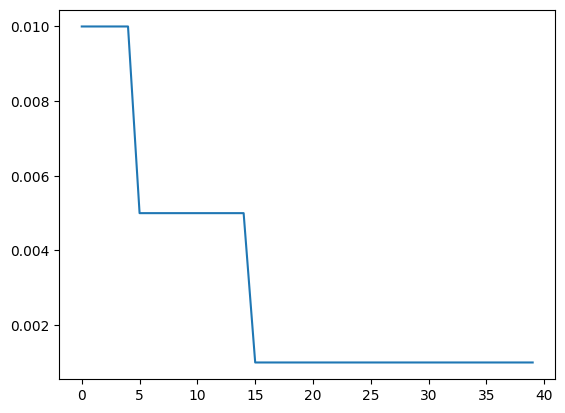

In [34]:
plt.plot(run_model3.epoch, run_model3.history["learning_rate"])

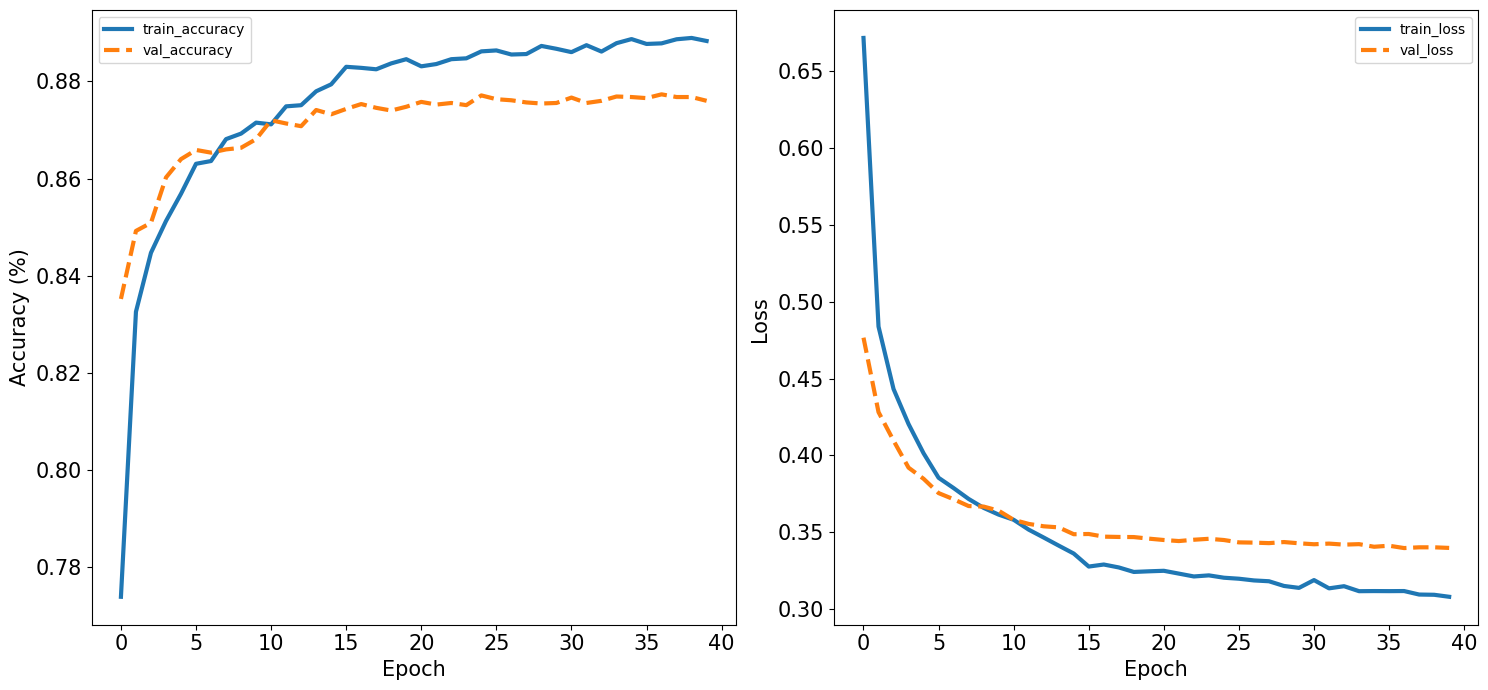

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed
ax1.plot(run_model3.history["accuracy"], label="train_accuracy", lw = 3, linestyle ='-')
ax1.plot(run_model3.history["val_accuracy"], label="val_accuracy", lw = 3, linestyle ='--')
ax1.set_ylabel('Accuracy (%)', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(run_model3.history["loss"], label="train_loss", lw = 3, linestyle ='-')
ax2.plot(run_model3.history["val_loss"], label="val_loss", lw = 3, linestyle ='--')
ax2.set_ylabel('Loss ', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


In [36]:
model3.evaluate(x_test, y_test, verbose = 0)

[0.36835670471191406, 0.8702999949455261]

## Performance

In [4]:
per_c = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, monitor = "val_loss")

In [6]:
#define model
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer = init1,  use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dense(10, activation = "softmax"),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [7]:
model4.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [8]:
run_model4 = model4.fit(x_train, y_train, epochs = 40, validation_split = 0.15, callbacks = [per_c])

Epoch 1/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7120 - loss: 0.8700 - val_accuracy: 0.8314 - val_loss: 0.4773 - learning_rate: 0.0100
Epoch 2/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8254 - loss: 0.5006 - val_accuracy: 0.8438 - val_loss: 0.4365 - learning_rate: 0.0100
Epoch 3/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8416 - loss: 0.4531 - val_accuracy: 0.8550 - val_loss: 0.4066 - learning_rate: 0.0100
Epoch 4/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8484 - loss: 0.4249 - val_accuracy: 0.8551 - val_loss: 0.3954 - learning_rate: 0.0100
Epoch 5/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8561 - loss: 0.4027 - val_accuracy: 0.8603 - val_loss: 0.3825 - learning_rate: 0.0100
Epoch 6/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8662 - loss: 0.3845 - val_accuracy: 0.8627 - val_loss: 0.3732 - learning_rate: 0.0100
Epoch 7/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8634 -

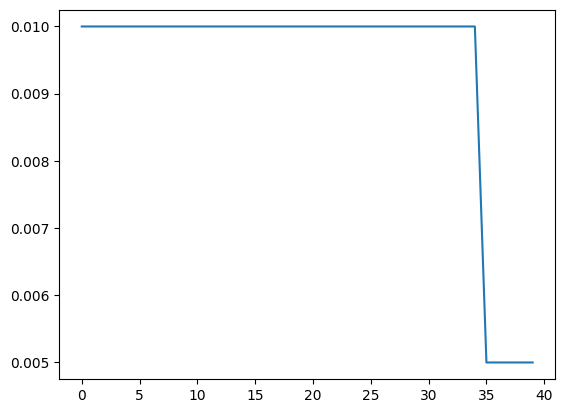

In [10]:
plt.plot(run_model4.epoch, run_model4.history["learning_rate"])

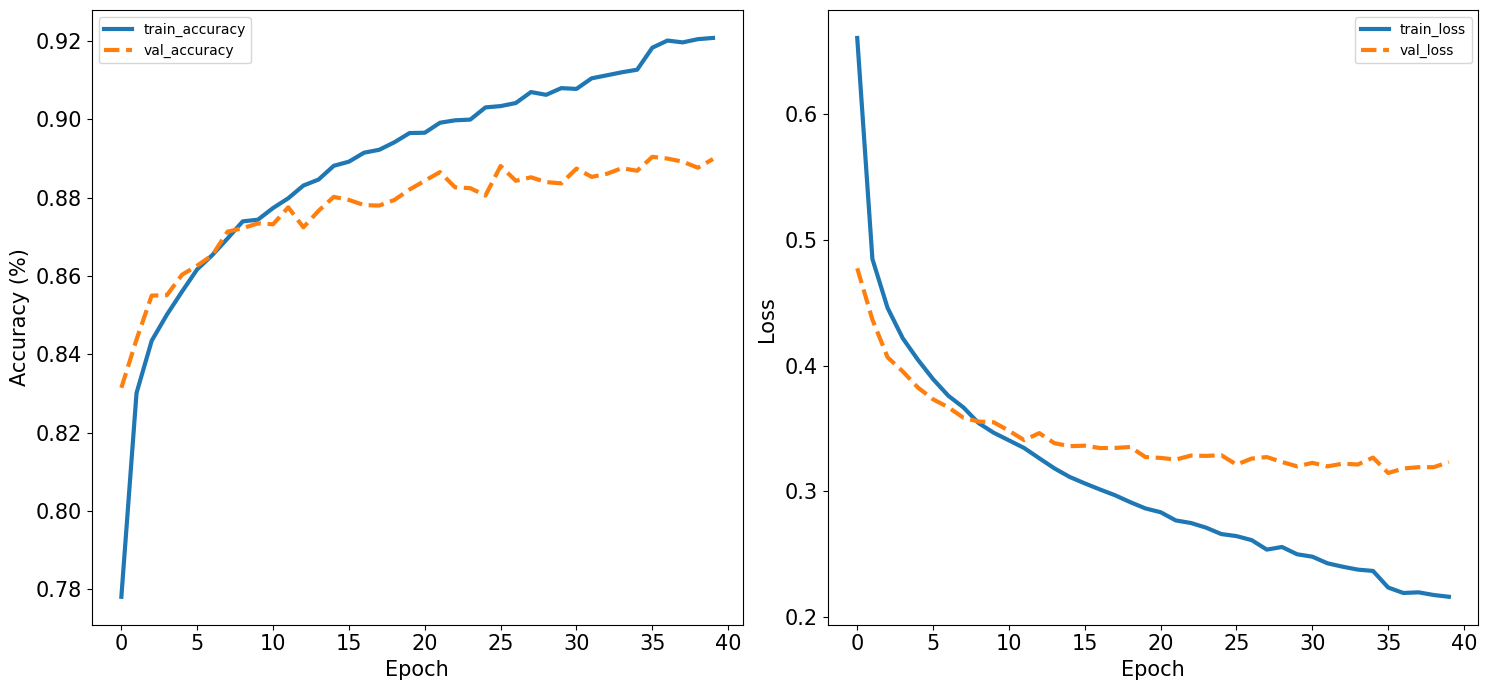

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed
ax1.plot(run_model4.history["accuracy"], label="train_accuracy", lw = 3, linestyle ='-')
ax1.plot(run_model4.history["val_accuracy"], label="val_accuracy", lw = 3, linestyle ='--')
ax1.set_ylabel('Accuracy (%)', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(run_model4.history["loss"], label="train_loss", lw = 3, linestyle ='-')
ax2.plot(run_model4.history["val_loss"], label="val_loss", lw = 3, linestyle ='--')
ax2.set_ylabel('Loss ', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


In [12]:
model4.evaluate(x_test, y_test, verbose = 0)

[0.3479773998260498, 0.8817999958992004]